In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from scipy.integrate import odeint
from math import pi
from pysindy.differentiation import FiniteDifference
fd = FiniteDifference(order=2, d=1)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import glob
from sklearn.metrics import mean_absolute_error

In [12]:
t = np.linspace(0,5*pi,10000)
x = t*np.sin(t) + 20

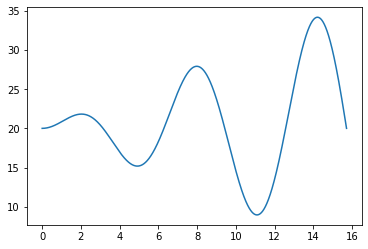

In [13]:
plt.plot(t,x)

In [14]:
dx = fd._differentiate(x, t)

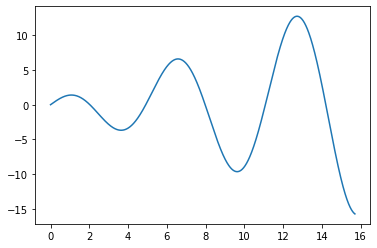

In [15]:
plt.plot(t,dx)

In [16]:
mdx = np.abs(dx)

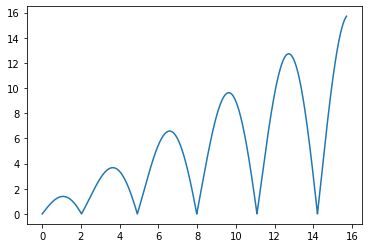

In [17]:
plt.plot(t, mdx)

In [18]:
def model(y, t):
    dydt = 1*np.abs(t*np.cos(t) + np.sin(t))*t*np.sin(t) - 0.25 * np.abs(t*np.cos(t) + np.sin(t))*y + 20*(t*np.cos(t) + np.sin(t))
    return dydt

In [19]:
y0 = 0
y = odeint(model, y0, t)

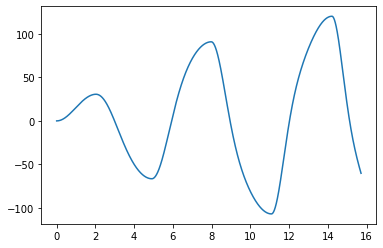

In [20]:
plt.plot(t,y)

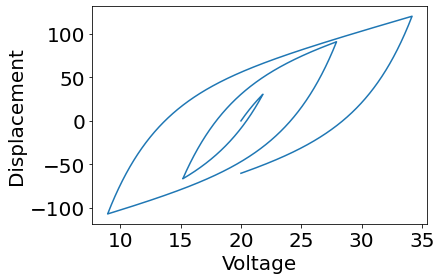

In [23]:
plt.plot(x, y)
plt.xlabel('Voltage', fontsize = 20)
plt.ylabel('Displacement', fontsize = 20)
#plt.legend(['Actual function' , 'Learned function', 'Training Data'], prop={'size': 16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig("Pics/slide3.png", dpi = 1000, bbox_inches='tight')

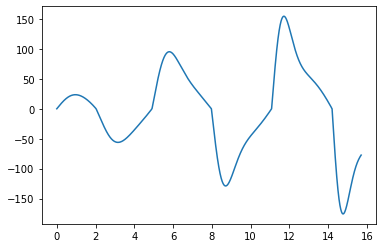

In [22]:
dy = fd._differentiate(y, t)
plt.plot(t, dy)

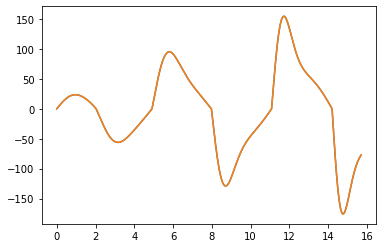

In [13]:
y = y.reshape(-1,)
dy = dy.reshape(-1,)
t1 = x*mdx
t2 = mdx*y
t3 = dx
terms = t1-0.25*t2+20*t3
plt.plot(t,terms)
plt.plot(t, dy)

In [14]:
X = np.stack((y, t1, t2, t3), axis=-1)

In [15]:
model = ps.SINDy()
model.fit(X,t)
model.print()

(x0)' = 1.000 x1 + -0.250 x2 + 20.000 x3
(x1)' = -1.450 1 + -0.353 x0 + -2.997 x1 + 0.489 x2 + -14.543 x3 + 0.109 x3^2
(x2)' = -16.606 1 + -0.810 x0 + -27.607 x1 + 2.724 x2 + -62.029 x3 + -0.477 x0 x3 + 0.184 x1 x3 + 3.309 x3^2
(x3)' = -1.000 1 + 0.190 x3


In [21]:
c1 = 1
c2 = -0.25
c3 = 20
def test_model(y, t):
    dydt = c1*np.abs(t*np.cos(t) + np.sin(t))*t*np.sin(t) + c2 * np.abs(t*np.cos(t) + np.sin(t))*y + c3*(t*np.cos(t) + np.sin(t))
    return dydt

In [22]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

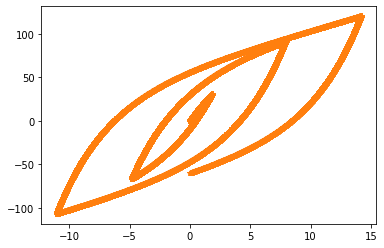

In [23]:
plt.plot(x, y)
plt.plot(x, y_test, '*')

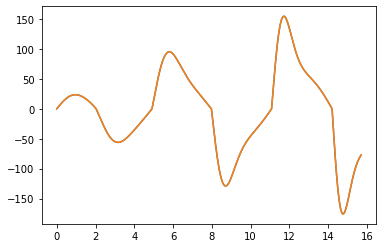

In [24]:
test = c1*t1+c2*t2+c3*t3
plt.plot(t,test)
plt.plot(t,dy)

In [25]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test: ", relative_error_test*100, "%")

Relative Error Test:  0.0 %
